# Постановка задачи классификации

**Математическая постановка задачи**

Пусть имеется множество некоторых объектов $S$, и имеется множество классов  $K = \{0,1....n\} \in N $. 

Тогда задачей классификации будем называть задачу по нахождению такого суръективного отображения $f(s)= k : s \in S$, $k \in K$

**Задача классификации в машинном обучении**

В случае решения задачи классификации методами машинного обучения задача относится к классу задач *supervised learning* (обучение с учителем)

В случае если $|K|=2$, то имеем два класса и задача называется задачей бинарной классификации.

В случае если $|K|>2$, то имеем более двух классов и поставленная задача называется задачей мультиклассификации

**Практические примеры постановки задач классификации**

* Бинарная классификация пользователей по результативности взаимодействия с ними (влияет ли взаимодействие на действия пользователя или нет)
* Мультиклассификация пользователей по результативности взаимодействия с ним (негативное влияние на принятие решения после действия / нейтральное / позитивное влияние)
* Классификация посетителей магазина по изображениям / видео / истории покупок etc (мужчина/женщина | покупатель / работник | финансовый класс покупателя )
* Классификация филиалов сети по сложности протекающих на них процессов (упрощение управления филиалом в зависимости от класса сложности)

*Замечание 1*: 

    Первые два примера постановки задачи классификации на самом деле относятся к теме uplift моделирования и в более частых случаях решаются при помощи данных методов. 
    Однако также допустимо решение данных практических задач через постановку задачи классификации.

*Замечание 2*:

    Между задачами классификации и кластеризации имеется очень тонкая грань. 
    Стоит учитывать, что (например) последнюю задачу связанную с классификацией филиалов сети возможно поставить как через задачу классификации так и через задачу кластеризации. 
    Однако в первом случае понадобятся размеченные данные, что расширит способы решения задачи, однако увеличит и затраченные ресурсы на разметку данных.
    Также в данном случае при отсутствии строгого алгоритма проставления меток классов при разметке, приведет к субъективной оценки филиалов разметчиками.

# Методы оценки модели при задачи классификации

## Бинарный случай

После построения модели AI, необходимо иметь возможность оценки качества работы модели, для дальнейшего выбора наилучшей модели.

Для начала введём и построим оценки для самого простейшего случая задачи классификации - бинарной классификации. В дальнейшем обобщим их на случай мультиклассификации.

### Confusion Matrix (матрица ошибок)

Обычно в задачах классификации возможно встретить следующие обозначения:

$y$ - истинные классы объектов

$\hat{y}$  - предсказанные моделью классы объектов

В случае бинарной классификации имеется всего 2 класса. При кодировании обозначим их как 0 и 1. 

Тогда соответственно получим 4 комбинации представленных в следующей таблице:

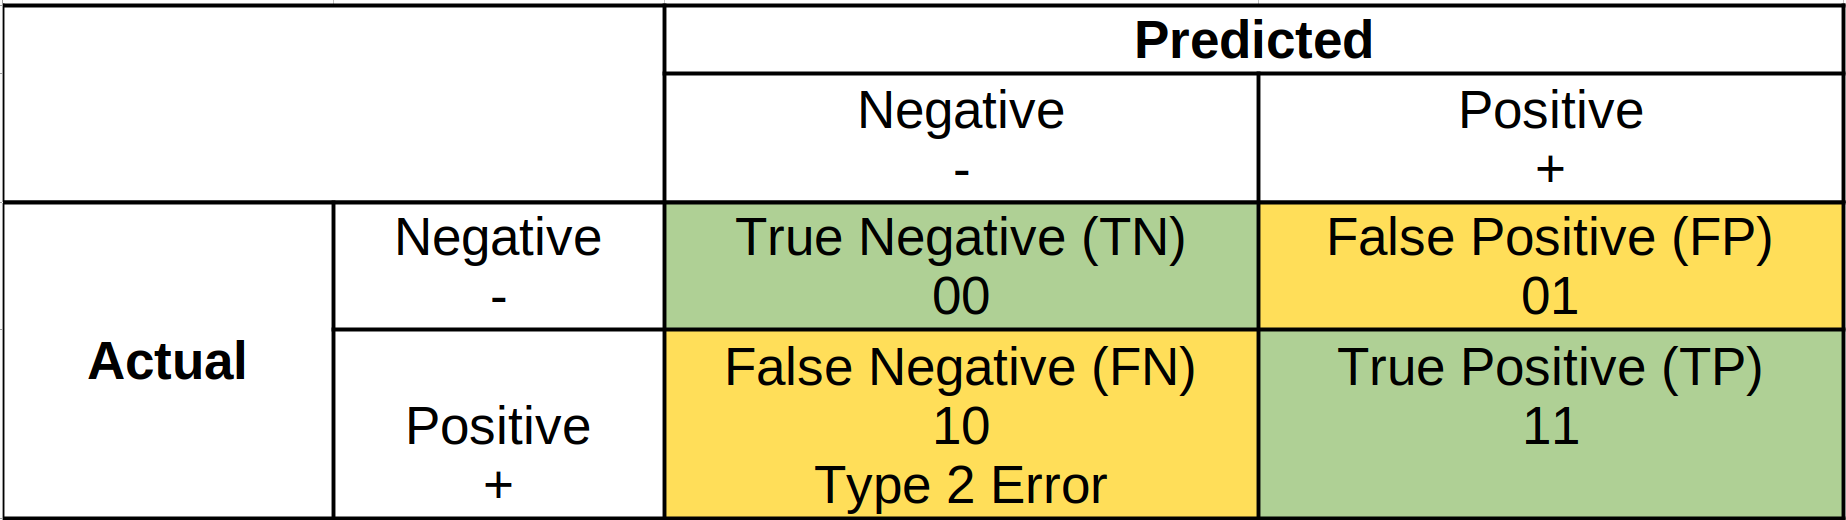

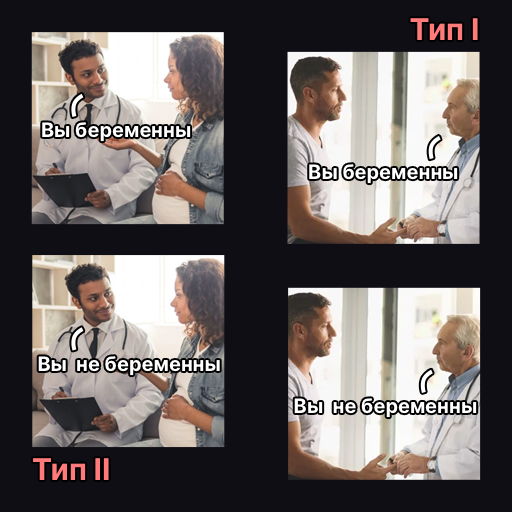

Для наилучшего понимания принятых обозначений необходимо постараться перевести дословно. 

Например: (False Negative - ошибочно (определенный) негативный класс. "Ошибочно" означает что модель допустила ошибку при классификации, а негативный класс означает что она ошиблась, когда объект носил нулевой класс. Таким образом т.к. модель ошиблась она предсказала 1 класс хотя истинный был 0.

Полезные выводы из матрицы ошибок:

1. $TN + TN + FP + FN  = |S|$ - сумма всех исходов равна сумме классифицируемых объектов
2. $TN + TP $ - количество верно классифицированных объектов
3. $FN + FP$  - количество ошибочно классифицированных объектов
4. $TN + FP$  - количество объектов в выборке принадлежащих 0 классу
5. $TP + FN$  - количество объектов в выборке принадлежащих 1 классу

Из подсчитанных выше количественных показателей результатов классификации возможно вывести различные метрики например :


In [13]:
from sklearn.metrics import confusion_matrix
y_true = [1, 0, 1, 1, 0, 1, 0, 0, 0, 1]
y_pred = [0, 0, 1, 1, 1, 0, 0, 0, 0, 0]
confusion_matrix(y_true, y_pred)

array([[4, 1],
       [3, 2]])

Text(0.5, 1.0, 'Confusion Matrix for the Diabetes Detection Model')

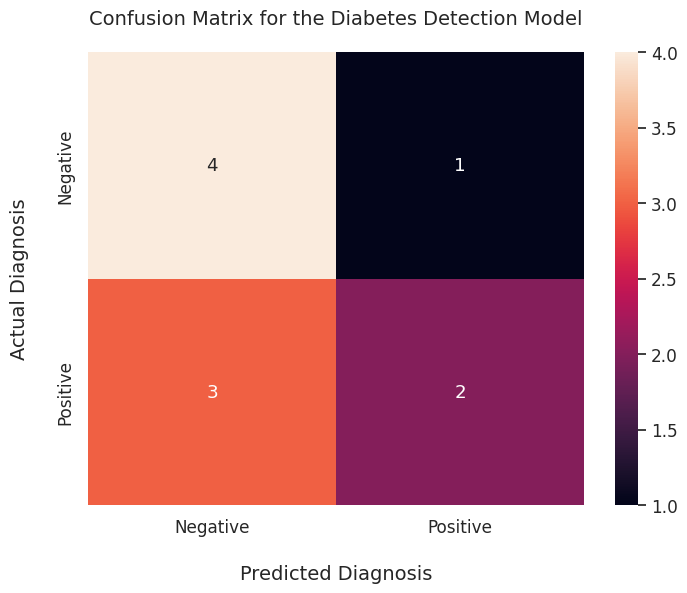

In [14]:
import seaborn as sns
from matplotlib import pyplot as plt

# Change figure size and increase dpi for better resolution
plt.figure(figsize=(8,6), dpi=100)
# Scale up the size of all text
sns.set(font_scale = 1.1)

# Plot Confusion Matrix using Seaborn heatmap()
# Parameters:
# first param - confusion matrix in array format   
# annot = True: show the numbers in each heatmap cell
# fmt = 'd': show numbers as integers. 
ax = sns.heatmap(confusion_matrix(y_true, y_pred), annot=True, fmt='d', )

# set x-axis label and ticks. 
ax.set_xlabel("Predicted Diagnosis", fontsize=14, labelpad=20)
ax.xaxis.set_ticklabels(['Negative', 'Positive'])

# set y-axis label and ticks
ax.set_ylabel("Actual Diagnosis", fontsize=14, labelpad=20)
ax.yaxis.set_ticklabels(['Negative', 'Positive'])

# set plot title
ax.set_title("Confusion Matrix for the Diabetes Detection Model", fontsize=14, pad=20)


### Accuracy

$Accuracy = \dfrac{TP + TN}{TP + TN + FP + FN}$

Данная метрика отображает долю правильно предсказанных объектов от всех рассматриваемых классификатором объектов.

Пример когда использовать accuracy - плохо:

Пусть мы классифицируем клиентов для выдачи кредитов и решили построить модель кредитного скоринга. Пусть по статистике среди 100 человек НЕ возвращает всего 5 человек.
Построив модель предсказывающую только то, что человек всегда возвращает кредит, наша оценка примет значение 95%. Однако, она совершенно не решит практической задачи.

Таким образом данная оценка не подходит при высоком дисбалансе классов и высокой вероятности одного из предсказываемых классов.

#### Многоклассовый  Accuracy

Плюсом данной метрики является возможность её применения для случая мультиклассификации.

Вспомнив смысл accuracy (доля правильных ответов) можно вывести формулу. Будем учитывать в числитель только те случаи когда метка класса предсказана верно.

Тогда формула примет вид:

$Accuracy = \dfrac{\sum(\hat{y_i} = y_i)}{|S|}$


### Precision

$Presicion = \dfrac{TP}{TP+FP}$

Точность - доля верно предсказанных объектов класса 1 от всех объектов предсказанных первым классом. Отображает насколько точно мы способны предсказывать первый класс

### Recall

$Recall = \dfrac{TP}{TP+FN}$

Полнота - доля верно предсказанных объектов класса 1 от всех объектов являющихся первым классом. Отображает полноту предсказаний первого класса.

### F1-score

$F_1 = \dfrac{2\cdot Recall \cdot Precision}{Recall + Precision}$

Метрика связывающая точность и полноту, также называемая их средним. В идеальной ситуации стремимся получить $Recall$, $Precision = 1$ -> $F_1 = 1$

### ROC-AUC

ROC-кривая (ROC = receiver operating characteristic, иногда говорят «кривая ошибок»)

Качество оценивают как площадь под этой кривой – AUC (AUC = area under the curve)

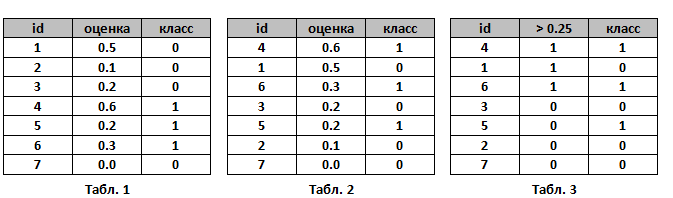

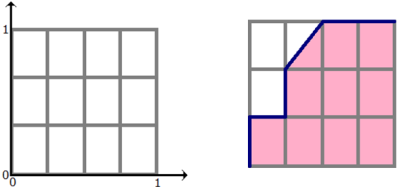

По оси $Ox$ откладываем вектор длинной равной количеству объектов нулевого класса умноженного на единичный вектор

По оси $Oy$ откладываем вектор длинной равной количеству объектов единичного класса умноженного на единичный вектор

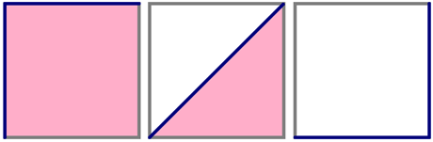

AUC ROC равен доле пар объектов вида (объект класса 1, объект класса 0), которые алгоритм верно упорядочил,

### PR-curve

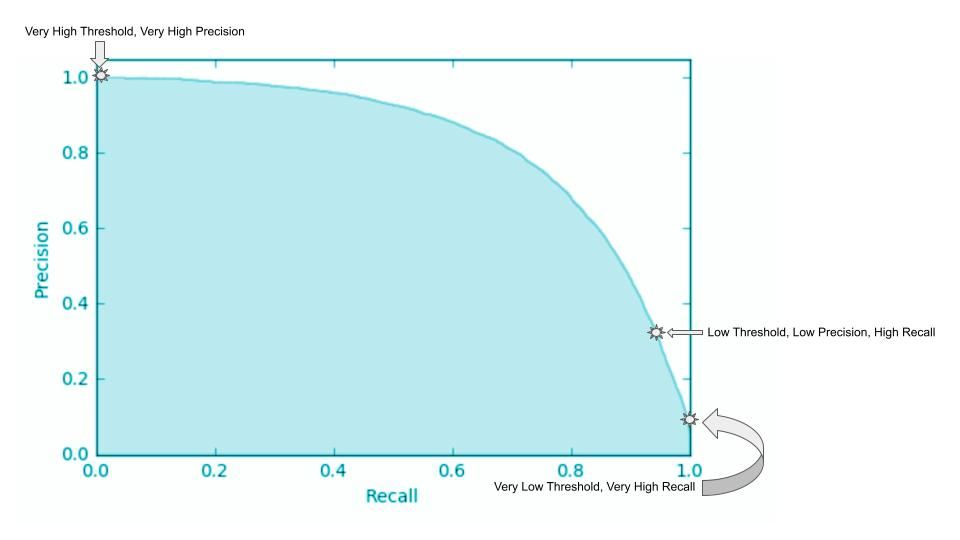

Визуализация позволяющая выбрать threshold вероятности для отнесения объекта к первому классу

## Случай мультиклассификации

В случае мультиклассификации все метрики рассчитываются для каждого класса отдельно.

В случае $Precision$ и $Recall$ также допустимо использование микро и макро усредненных значений для оценки в целом

$$Presicion = \dfrac{TP_A}{TP_A + FP_A}$$
$$Recall = \dfrac{TP_A}{TP_A + FN_A}$$
$$Precision_{macro} = \dfrac{Precision_A + Precision_B + ... Precision_N}{N}$$
$$Recall_{macro} = \dfrac{Recall_A + Recall_B + ... Recall_N}{N} $$
$$Precision_{micro} = \dfrac{TP_A + TP_B + ... + TP_N}{TP_A + FP_A + TP_B + FP_B + ... + TP_N+ FP_N}$$

Основным отличием микро от макро показателя является взвешивание оценки на количество экземпляров в классе

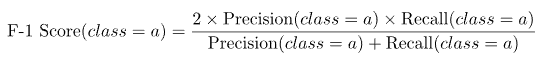

**roc-auc**

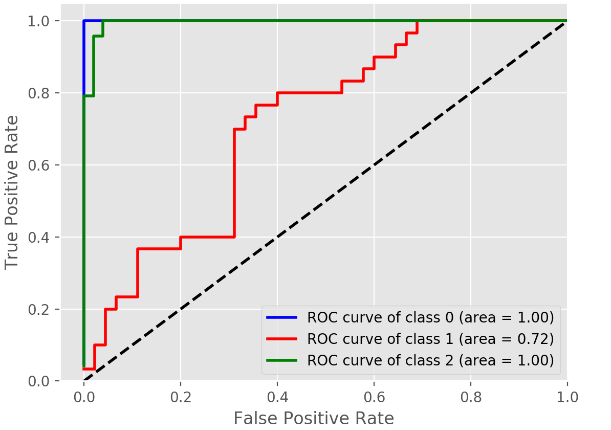

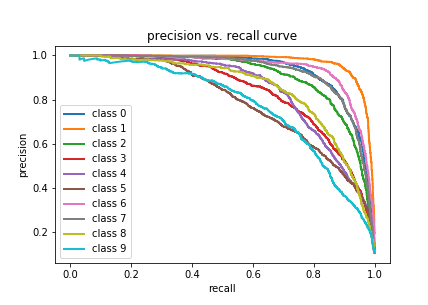